# Iris classification

### Iris is a genus of 260--300 flowering plants with showy flowers. It takes its name from the Greek word for a rainbow, which is also the name for the Greek goddess of the rainbow, Iris.


### There are almost 300 different species of Iris has been already discoverd, for our Data Science purpose we are going to make EDA for following 3 different Iris species:
1.Setosa
2.Versicolor
3.Virginica


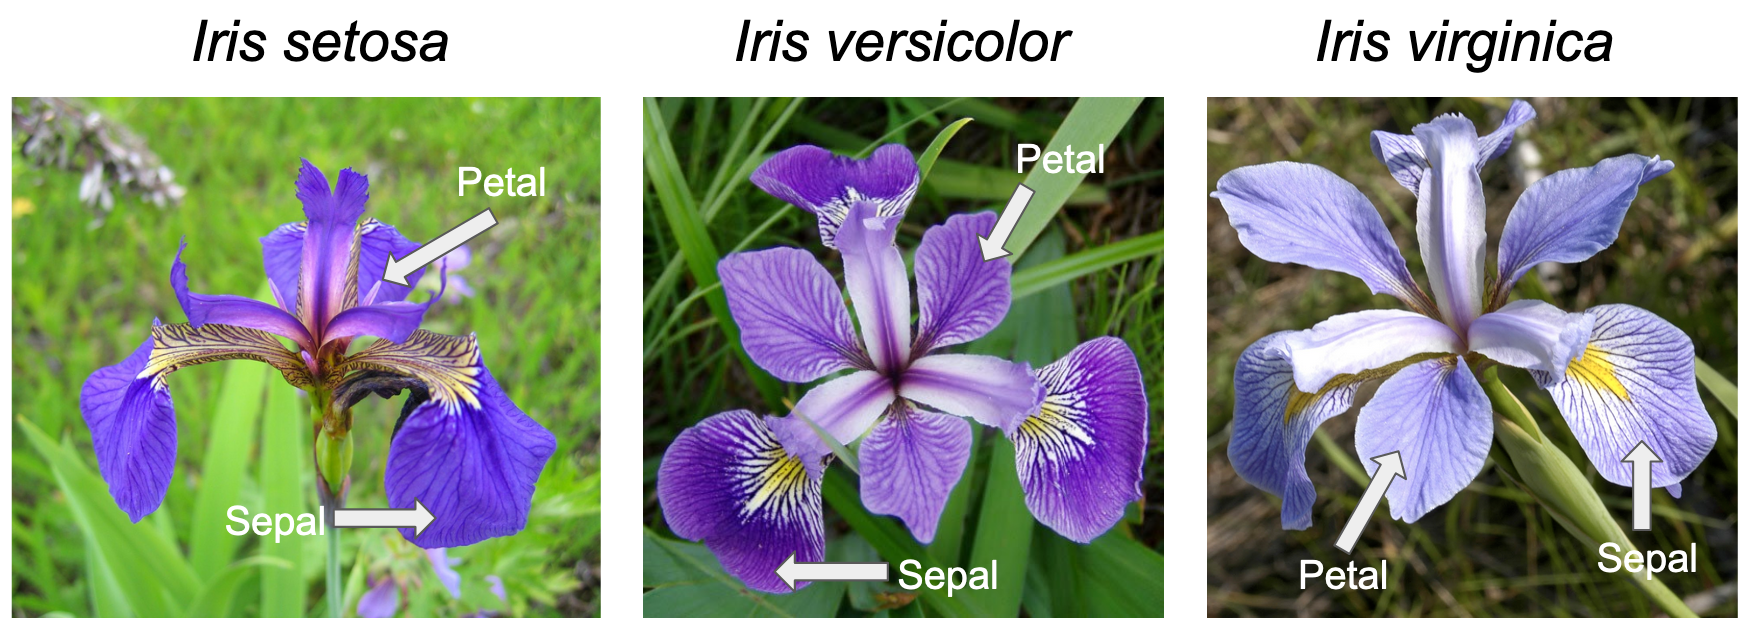

### The flowers are classified by the features:
1.sepal lenght
2.sepal width
3.petal length
4.petal width

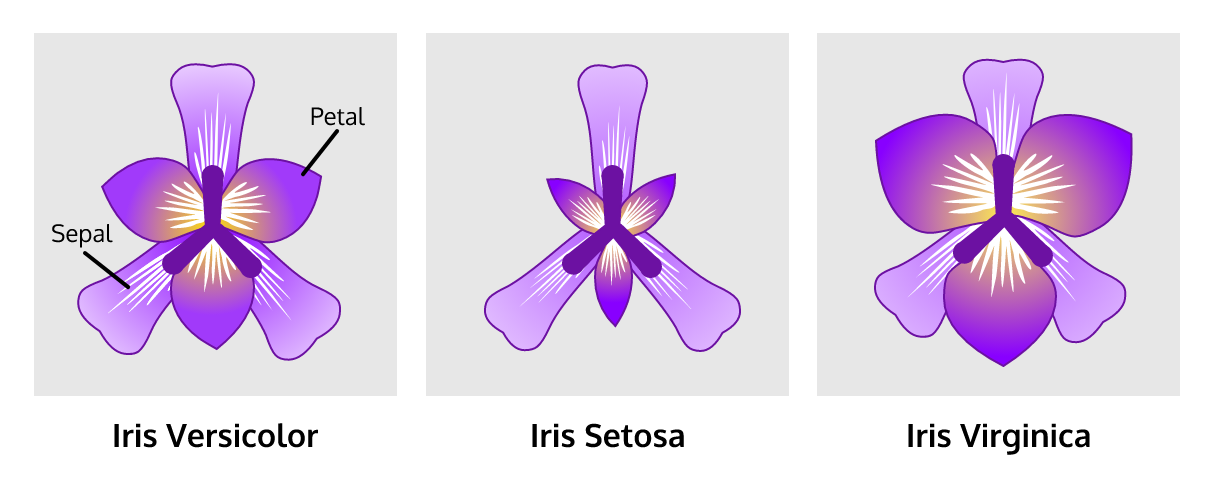

import some library 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get Data

In [2]:
iris=pd.read_csv('IRIS.csv')

In [3]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## Data visualization

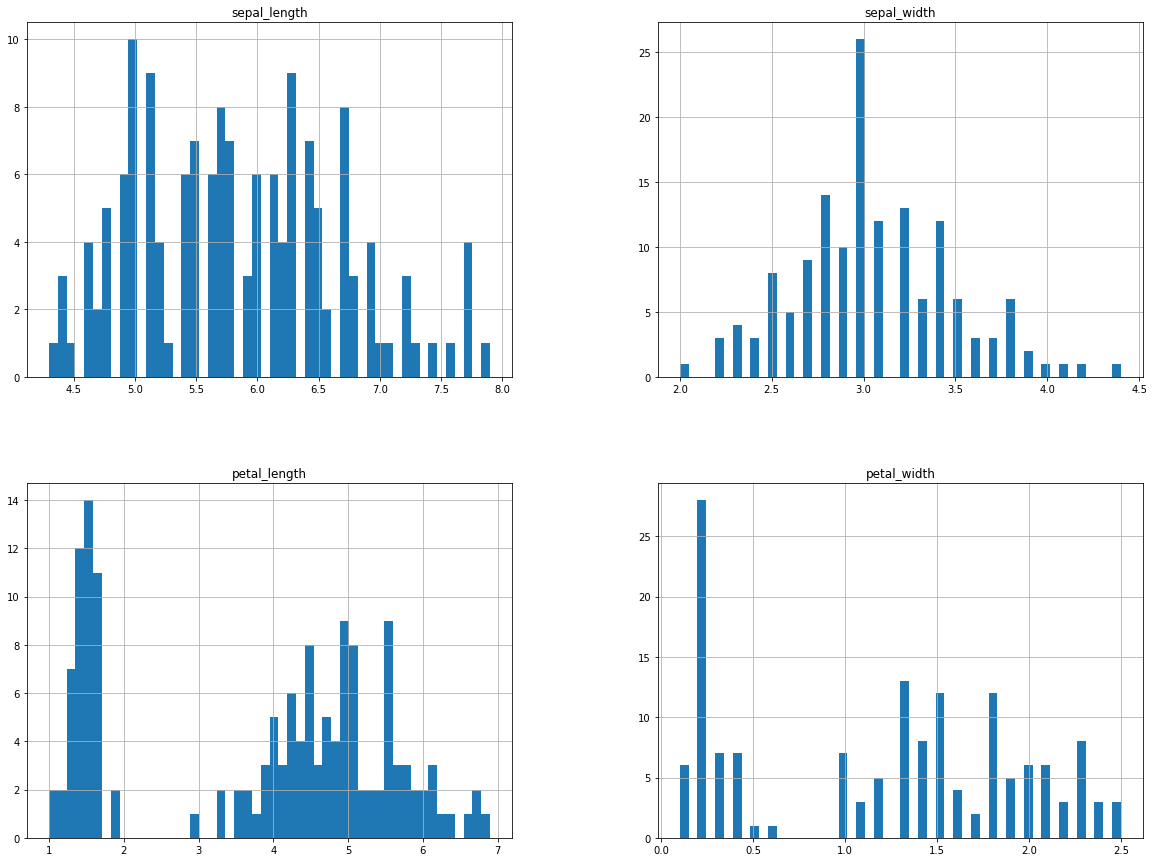

In [6]:
iris.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

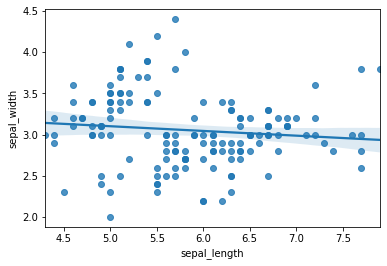

In [7]:
sns.regplot(x=iris["sepal_length"], y=iris["sepal_width"])

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

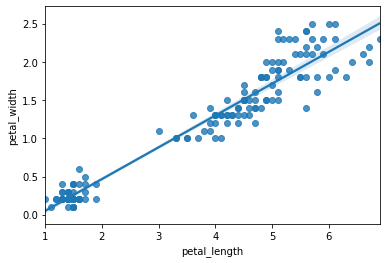

In [8]:
sns.regplot(x=iris["petal_length"], y=iris["petal_width"])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

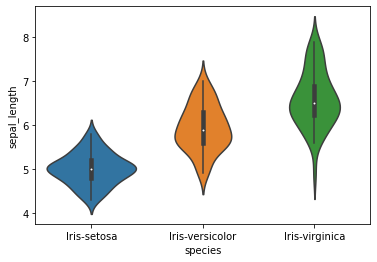

In [9]:
sns.violinplot(x=iris["species"], y=iris["sepal_length"])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

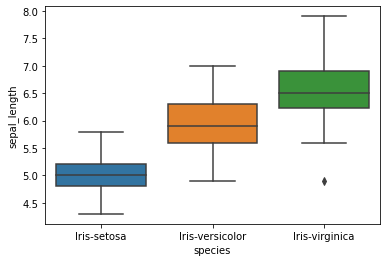

In [10]:
sns.boxplot( x=iris["species"], y=iris["sepal_length"] )

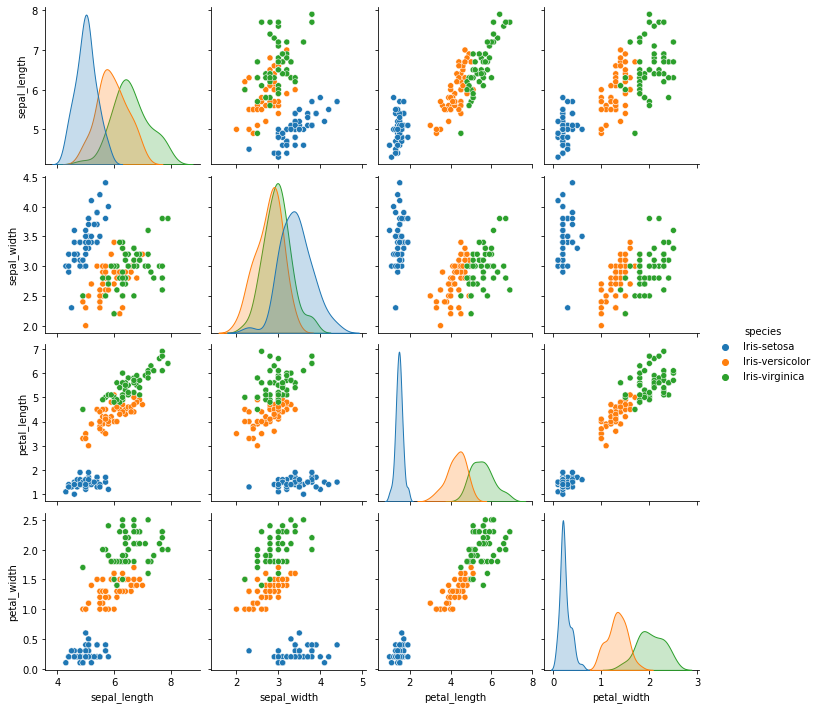

In [11]:
sns.pairplot(iris , hue='species')

In [12]:
species = {
    "Species" : {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
}
iris.replace(species,inplace=True)
iris

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [13]:
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

<AxesSubplot:>

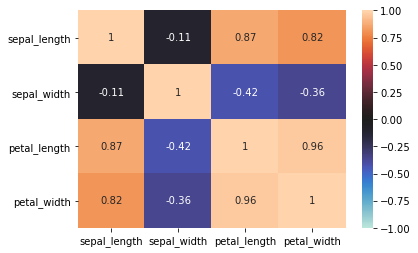

In [14]:
sns.heatmap(iris.corr(), annot = True, vmin=-1, vmax=1, center= 0)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

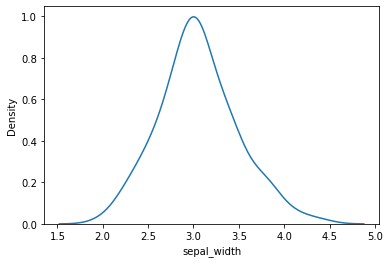

In [15]:
sns.kdeplot(iris['sepal_width'])

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

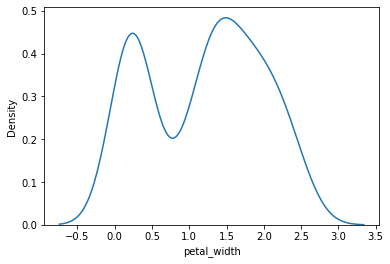

In [16]:
sns.kdeplot(iris['petal_width'])

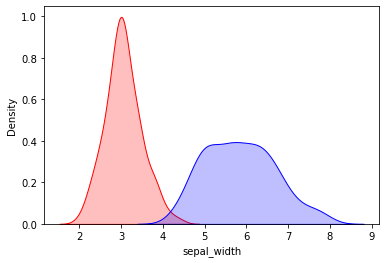

In [17]:
fig = sns.kdeplot(iris['sepal_width'], shade=True, color="r")
fig = sns.kdeplot(iris['sepal_length'], shade=True, color="b")
plt.show()

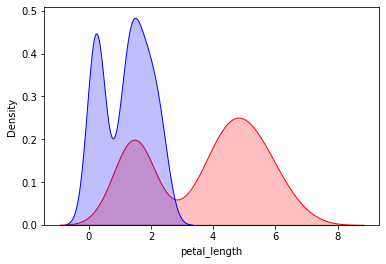

In [18]:
fig = sns.kdeplot(iris['petal_length'], shade=True, color="r")
fig = sns.kdeplot(iris['petal_width'], shade=True, color="b")
plt.show()

## Classification

### import some library

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [51]:
x = iris.drop('species', axis=1)
y= iris.species


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

### Performance measure 

In [53]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [54]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.96666667, 0.7       , 0.93333333])

### Dumb classifier

In [55]:
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        return self
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [56]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0., 0., 0.])

### Confusion matrix

In [57]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[30,  0,  0],
       [ 4, 24,  1],
       [ 1,  6, 24]], dtype=int64)

In [58]:
y_train_perfect_predictions = y_train
confusion_matrix(y_train, y_train_perfect_predictions)

array([[30,  0,  0],
       [ 0, 29,  0],
       [ 0,  0, 31]], dtype=int64)

### Precision and Recall

In [59]:
precision_score(y_train, y_train_pred,pos_label='positive',average='macro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.8723809523809524

In [60]:
recall_score(y_train, y_train_pred,pos_label='positive',average='macro') 

0.8672599184278829

### f1 score

In [61]:
f1_score(y_train, y_train_pred,pos_label='positive',average='macro')

0.8645930340845595

### SGD classifier

In [65]:
sgd_clf = SGDClassifier(random_state=42)

In [69]:
sgd_clf.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

### accurcy using cross validation score ()

In [71]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.96666667, 0.7       , 0.93333333])

### accurcy try scaling input

In [74]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9       , 0.9       , 0.93333333])

## Error Analysis

### the confusion matrix

In [76]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[30,  0,  0],
       [ 1, 25,  3],
       [ 0,  4, 27]], dtype=int64)

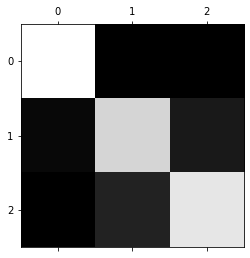

In [77]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [78]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

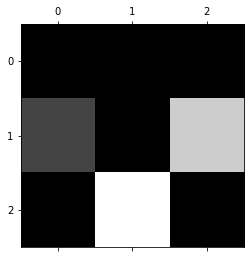

In [79]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## knn

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [86]:
y_train_knn_pred = cross_val_predict(knn, x_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9444290080577938